In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyowm
from mpl_toolkits.basemap import Basemap, cm

In [3]:
#Retrieve api-key
with open('api-key/owm-api-key.txt', 'r') as key_file:
    key = key_file.read()

owm = pyowm.OWM(key)

dic = owm.city_id_registry()

In [4]:
#Read cities list
cities = pd.read_csv("data/cities.csv", ';')
valid_cities = []


In [19]:
locrows = []
for index, row in cities.iterrows():
    lookup = dic.locations_for(row['City'].decode("utf-8"))
    if lookup==[]:
        print(row['City'])
    else:
        locrows.append([lookup[0]])
        valid_cities.append(lookup[0])

In [20]:
#Get the observations for each city via the OWM API
observation_list = []
id20s = []
elt_id20 = []
c = 0
ids = []
dfrows = locrows

for row in dfrows:
    cit = row[0]
    row.append(cit.get_ID())
    row.append(cit.get_lat())
    row.append(cit.get_lon())
    row[0] = cit.get_name().encode("utf-8")

df = pd.DataFrame(dfrows, columns=['City', 'ID', 'Lat', 'Lon'])

In [21]:
df.to_csv('data/locations.csv')

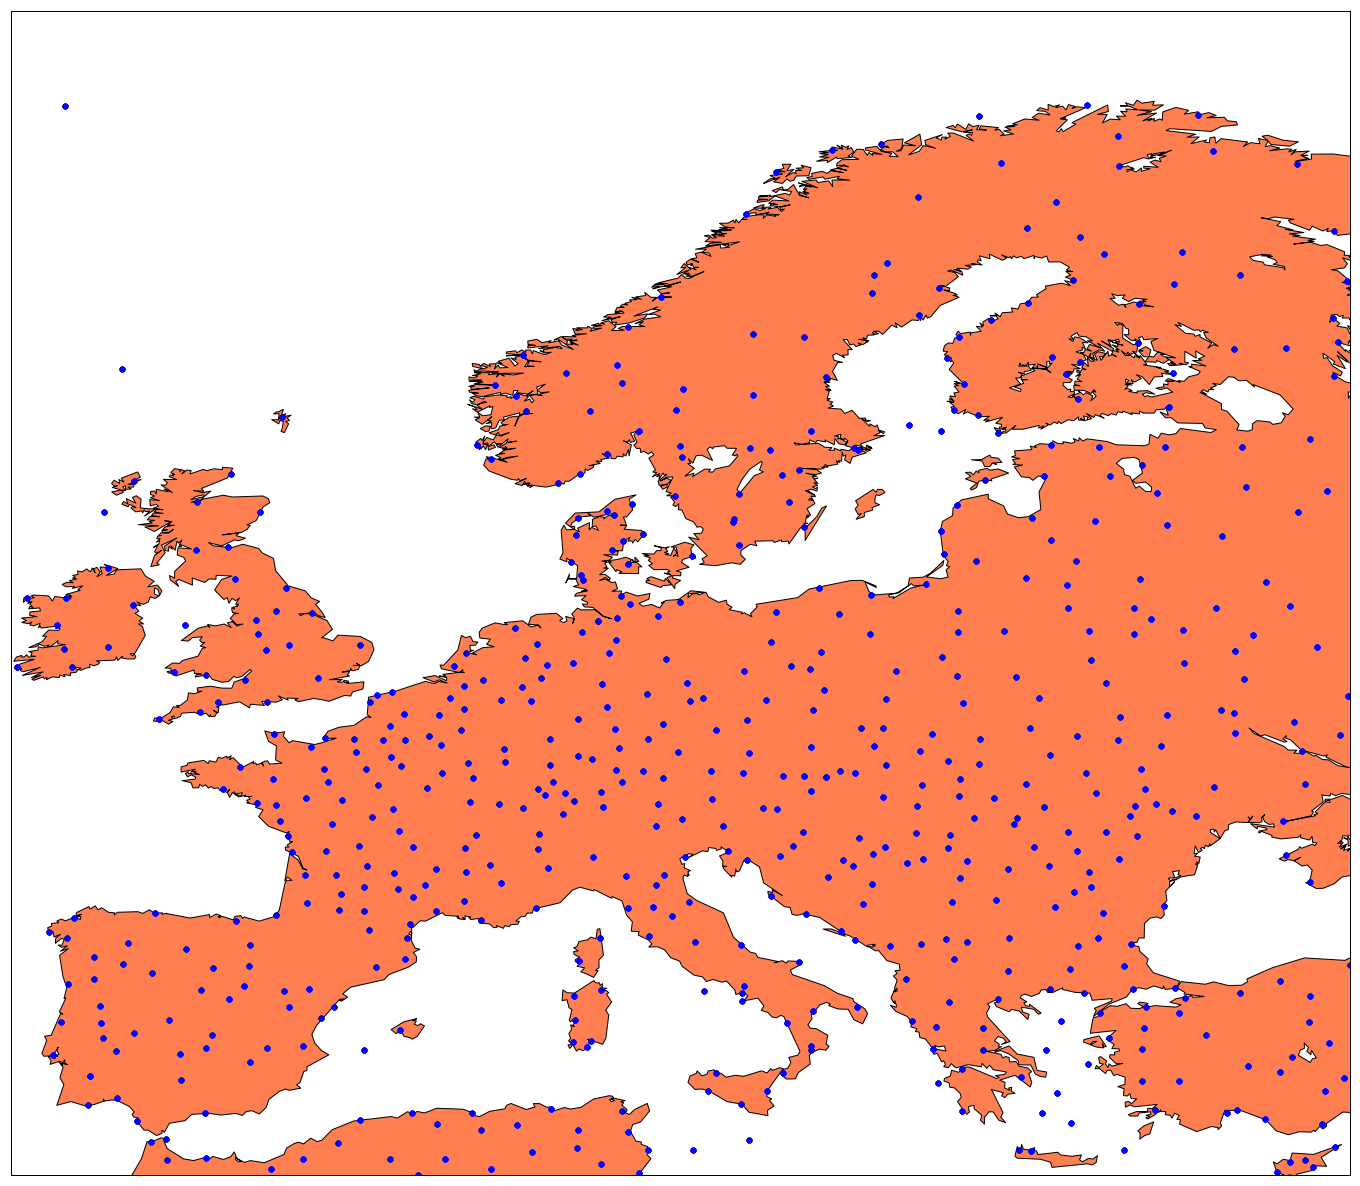

In [23]:
#Get cities coordinates
lon = []
lat = []
for city in valid_cities:
    lon.append(city.get_lon())
    lat.append(city.get_lat())
    
#Plot the cities on a map
plt.figure(figsize=(24,24))
map = Basemap(llcrnrlon=-10.56,llcrnrlat=34.65,urcrnrlon=34.88,urcrnrlat=74.17, resolution = 'l', epsg=4668)
map.drawmapboundary(fill_color='white')
map.fillcontinents(color='coral',lake_color='white')
map.drawcoastlines()
x, y = map(lon, lat)
map.plot(x, y, 'bo', markersize=5)